# Project: Investigate Hospital noshow appointments data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

With this project we'll be anyalyzing the dataset for hospital appointments which has information on 100,000 medical appointments in Brazil and is focused on the questions as to what are the factors which affect patients showing up for appointments. 

A number ofcharacteristics about the patient are included in each row:
 - ‘ScheduledDay’ tells us on what day the patient set up their appointment
 - ‘Neighborhood’ indicates the location of the hospital
 - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família [Bolsa Família (Family Allowance) is a social welfare program of the Government of Brazil, part of the Fome Zero network of federal assistance programs. Bolsa Família provides financial aid to poor Brazilian families; and if they have children, families must ensure that the children attend school and are vaccinated. If they exceed the total of permitted school absences, they are dropped from the program and their funds are suspended. The program attempts to both reduce short-term poverty by direct cash transfers and fight long-term poverty by increasing human capital among the poor through conditional cash transfers. It also works to give free education to children who cannot afford to go to school to show the importance of education.] - _taken from Wikipedia_
 - 'No-show' says ‘No’ if the patient showed up to their appointment,and ‘Yes’ if they did not show up
 -  Appointment ID,Gender,Schdedule Day,Appointment Day,Age, Neighbourhood,Hipertension,Diabetes, Alcholism, Handicap, SMS are other self explanatory obesrvations availbale for each patient

**Dependent Variable for analysis:** <br>
**'No-show'** <br>
We want to predict based on the rest of the data whether the patient will show up for the appointment

**Independent Variables for analysis: <br>Scholarship , SMS_recieved,Handcap, Alcoholism, Gender, Neighbourhood and Age**



In [2]:
# import statements for all of the packages that are going to be used.
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

**We check for the following:**
- How the data looks?
- Datatypes of each column
- Check for null values

In [3]:
# Load data 
os.chdir('C:/UTD/Nanodegree/2. Project 2/Project')
df=pd.read_csv('noshow2016.csv')

In [3]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

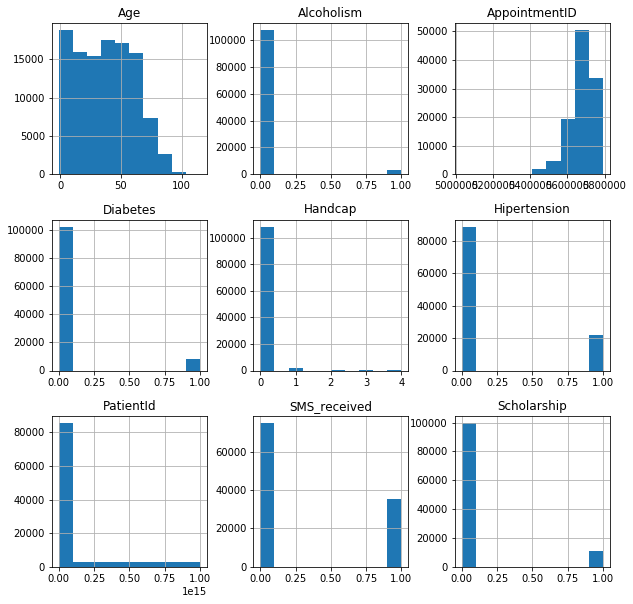

In [6]:
df.hist(figsize=(10,10));

**Notes from the above dataframe histogram:**
- Most people making appointments are less than 70 years old. 
- Most people do not have alcoholism
- Most people do not have diabetes
- Most poeple do not have a handicap. Handicap has more than 2 categories. 
- Most people do not have hypertension
- Patient ID is meaningless, we need to remove it
- Most people did not receive an SMS
- Most people do not have a scholarship


In [7]:
df['AppointmentID'].nunique()

110527

There are no null values in the data.

The PatientID variable is a float type. There's no use of the column. We'll drop it. We can use Appointment ID as a unique indentifier. 

Let's first change column labels for convineance

### Data Cleaning

**We do the following changes to the data:**
- Rename all columns to use lower case letter
- Rename columns which a hyphen and convert those to an underscore
- Drop 'patient ID' since it is not giving any information
- Convert the 'No-show' column to a 'show' column with 1 representing patient showed up and 0 representing patient did not show up

In [4]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)  # changing column labels to lowercase and striping -  and replacing it with _

In [9]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [5]:
df.drop(['patientid'],axis=1,inplace=True) # dropping patient ID

In [11]:
df.head(2)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [12]:
df.nunique()

appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
no_show                2
dtype: int64

**IMPORTANT:**
**'No-show' says ‘No’ if the patient showed up to their appointment,and ‘Yes’ if they did not show up. I want to convert the 'no_show' column values from ('Yes','No') to a (0,1) integer value so that I can get sum and mean of this column. This will be done in a new column called 'show' where 1 will mean patient showed up and 0 will mean patient did not show up.**

In [6]:
df.no_show.replace(('Yes', 'No'), (0, 1), inplace=True)
df.rename(columns={'no_show':'show'},inplace=True)

In [14]:
df.head(1)

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
show              110527 non-null int64
dtypes: int64(9), object(4)
memory usage: 11.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Does having a scholarship affect patients showing up?

In [16]:
df['scholarship'].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

_It should be noted that there are just 10861 patient visits with scholarships out of a total of 110527 patient visits._

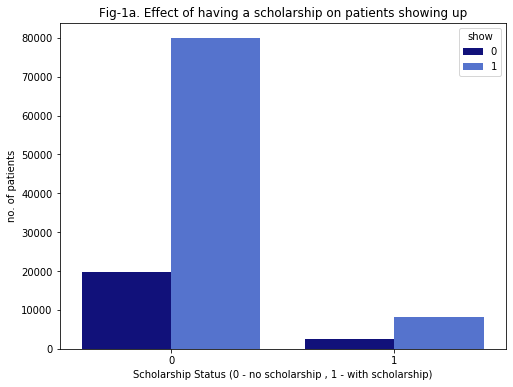

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
scholar_plot = sns.countplot(x="scholarship",hue='show', data=df,palette=["darkblue", "royalblue"])
scholar_plot.set_title('Fig-1a. Effect of having a scholarship on patients showing up')
scholar_plot.set_xlabel('Scholarship Status (0 - no scholarship , 1 - with scholarship)')
scholar_plot.set_ylabel('no. of patients');

People without scholarship show up the most among the four groups. Also, the number of people without scholarship are way more than people with scholarship. 
Therefore, we should also look at figures which've been scaled, like the mean of number of patients showing up for each category i.e. people with scholarship and people without.

In [38]:
scholar_1=df.scholarship==1
scholar_0=df.scholarship==0

In [41]:
scholar=df.show[scholar_1].mean() # mean of no.of people showing up with scholarship 

In [40]:
non_scholar=df.show[scholar_0].mean() # mean of no.of people showing up without scholarship 

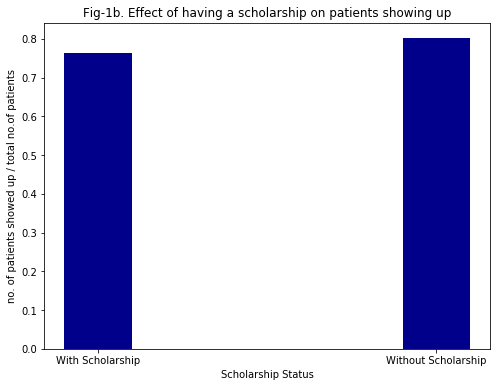

In [95]:
#bar plot
fig, ax = plt.subplots(figsize=(8, 6))
x=['With Scholarship','Without Scholarship']  # each category labels
plt.bar(x,height=(scholar,non_scholar),width=0.2,color='darkblue')
plt.title('Fig-1b. Effect of having a scholarship on patients showing up')
plt.xlabel('Scholarship Status')
plt.ylabel('no. of patients showed up / total no.of patients');

If we follow the mean statistic, the above analysis shows there's ,in fact, a larger probability of showing up for people without scholarship. But,only a slightly larger when compared to people with scholarship. 

### Research Question 2 : Does sending an sms effect patients showing up?

In [77]:
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

_Total number of patient visits where sms was received was 35482 out of a total number of patient visits of 110527_

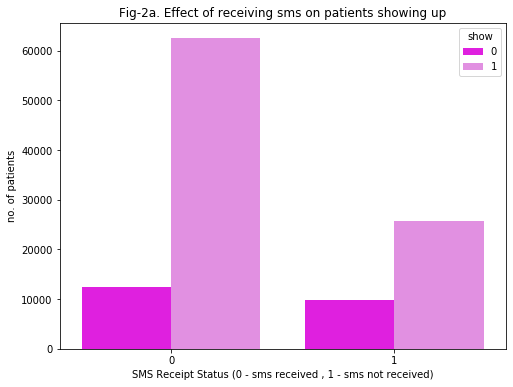

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))
sms_plot = sns.countplot(x="sms_received",hue='show', data=df,palette=['fuchsia','violet'])
sms_plot.set_title('Fig-2a. Effect of receiving sms on patients showing up')
sms_plot.set_xlabel('SMS Receipt Status (0 - sms received , 1 - sms not received)')
sms_plot.set_ylabel('no. of patients');

Most people who did not receive an SMS showed up. Again, the number of people who did not receive an SMS is way more than people who did. 
Therefore, we should also look at figures which've been scaled, like the mean of number of patients showing up for each category i.e. people who received SMS and people who did not.

In [102]:
sms_1=df.sms_received==1
sms_0=df.sms_received==0

In [51]:
sms=df.show[sms_1].mean() # mean of no.of people who received an SMS  and also showed up

In [52]:
sms_not=df.show[sms_0].mean() # mean of no.of people who did not receive an SMS  and showed up

In [53]:
#Percent improvement in number of patients showing up
(sms-sms_not)/sms_not

-0.13051219284763368

The above statistic shows that there's a 13% decline in showing up for people who received an SMS.

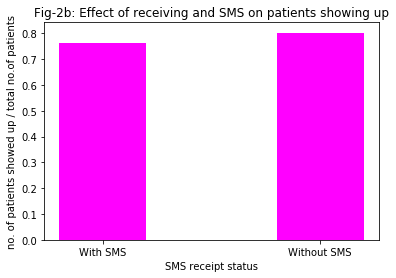

In [54]:
x=['With SMS','Without SMS']
plt.bar(x,height=(scholar,non_scholar),width=0.4,color='magenta')
plt.title('Fig-2b: Effect of receiving and SMS on patients showing up')
plt.xlabel('SMS receipt status')
plt.ylabel('no. of patients showed up / total no.of patients');

If we follow the mean statistic, people who do not receive an SMS are more likley to show up for the appointment.

### Research Question 3 : Does having a handicap effect patients showing up?

In [35]:
df['handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [56]:
df['handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

According to the description of 'handcap' variable on Kaggle, it should only have true or false values. We see that it has integer values (0,1,2,3,4). We'll consider all values other than 0 to signify : handicap = True. 

Also, note that 108286 patient visits are for people without handicap ( out of a total of 110527).

In [57]:
df.handcap.replace((0,1,2,3,4), (0,1,1,1,1), inplace=True)

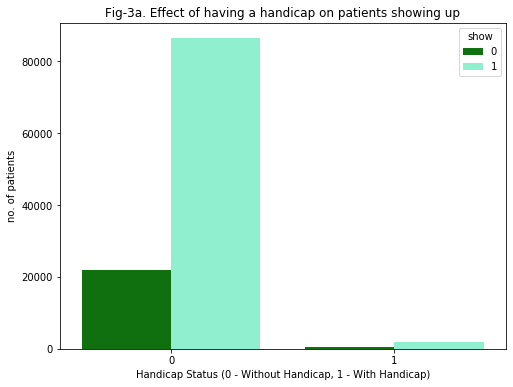

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))
sms_plot = sns.countplot(x="handcap",hue='show', data=df,palette=['green','aquamarine'])
sms_plot.set_title('Fig-3a. Effect of having a handicap on patients showing up')
sms_plot.set_xlabel('Handicap Status (0 - Without Handicap, 1 - With Handicap)')
sms_plot.set_ylabel('no. of patients');

The no. of people of who do not have a handicap who also show up is very high. Also, the number of people with handicap is very small. 
Therefore, we should also look at figures which've been scaled, like the mean of number of patients showing up for each category i.e. people who have a handicap and people who do not.

In [63]:
handicap_1=df.handcap==1
handicap_0=df.handcap==0

In [64]:
handicap=df.show[handicap_1].mean() # mean of no.of people who have a handicap  and also showed up

0.818384649709951

In [65]:
non_handicap=df.show[handicap_0].mean() # mean of no.of people who do not have a handicap and also showed up

0.7976469719077258

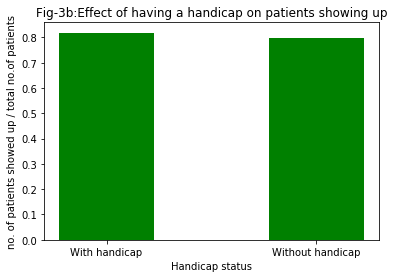

In [66]:
x=['With handicap','Without handicap']
plt.bar(x,height=(handicap,non_handicap),width=0.45,color='green')
plt.title('Fig-3b:Effect of having a handicap on patients showing up')
plt.xlabel('Handicap status')
plt.ylabel('no. of patients showed up / total no.of patients');

Above analysis shows that handicap doesn't really effect patients showing up

### Research Question 4 : Does alcoholism effect patients showing up?

In [103]:
df['alcoholism'].value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

There are 3360 people with alcoholism

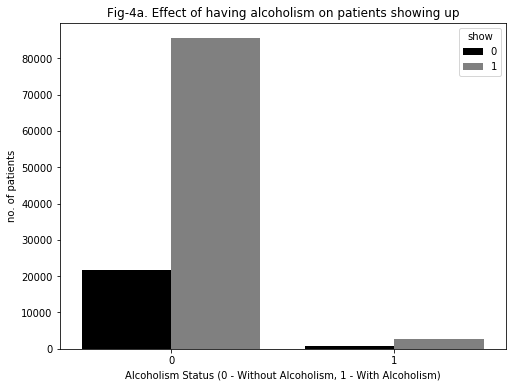

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))
sms_plot = sns.countplot(x="alcoholism",hue='show', data=df,palette=['k','grey'])
sms_plot.set_title('Fig-4a. Effect of having alcoholism on patients showing up')
sms_plot.set_xlabel('Alcoholism Status (0 - Without Alcoholism, 1 - With Alcoholism)')
sms_plot.set_ylabel('no. of patients');

The no. non-alcoholics showing up for appointments is the highest. Also, the number of people with alcoholism is very small. 
Therefore, we should also look at figures which've been scaled, like the mean of number of patients showing up for each category i.e. people who have alcoholism and people who do not.

In [106]:
alcohol_1=df.alcoholism==1
alcohol_0=df.alcoholism==0

In [108]:
alcohol=df.show[alcohol_1].mean() # mean of no.of people who have alcoholism and showed up

In [107]:
non_alcohol=df.show[alcohol_0].mean() # mean of no.of people who do not have alcoholism and showed up

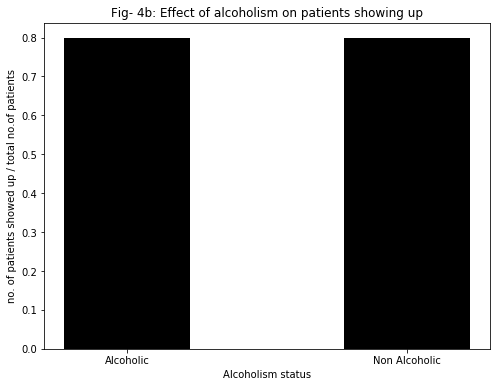

In [111]:
fig, ax = plt.subplots(figsize=(8, 6))
x=['Alcoholic','Non Alcoholic']
plt.bar(x,height=(alcohol,non_alcohol),width=0.45,color='black')
plt.title('Fig- 4b: Effect of alcoholism on patients showing up')
plt.xlabel('Alcoholism status')
plt.ylabel('no. of patients showed up / total no.of patients');

From the Analysis we get that alcoholism doesn't really effect patients showing up.

### Research Question 5 : Does gender affect patients showing up?

In [112]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

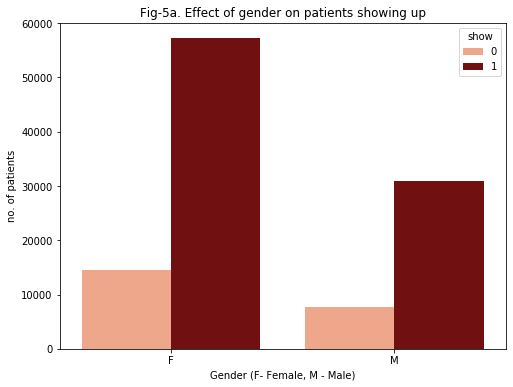

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))
sms_plot = sns.countplot(x="gender",hue='show', data=df,palette=['lightsalmon','maroon'])
sms_plot.set_title('Fig-5a. Effect of gender on patients showing up')
sms_plot.set_xlabel('Gender (F- Female, M - Male)')
sms_plot.set_ylabel('no. of patients');

The no. females showing up for appointments is the highest. Also, the number of male patients visting is small when compared to female patients. 
Therefore, we should also look at figures which've been scaled, like the mean of number of patients showing up for each category i.e. male and female.

In [118]:
male=df.gender=='M'
female=df.gender=='F'

In [119]:
female_show=df.show[female].mean() # mean of no.of females who showed up

In [120]:
male_show=df.show[male].mean() # mean of no.of males who showed up

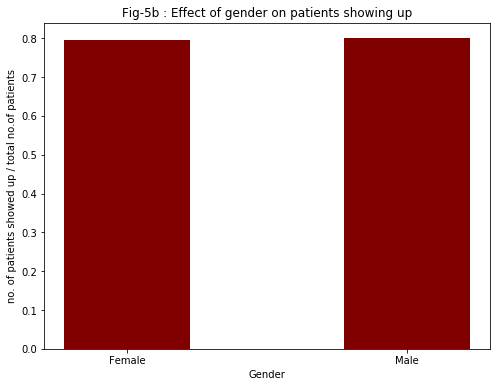

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))
x=['Female','Male']
plt.bar(x,height=(female_show,male_show),width=0.45,color='maroon')
plt.title('Fig-5b : Effect of gender on patients showing up')
plt.xlabel('Gender')
plt.ylabel('no. of patients showed up / total no.of patients');

From the analysis we get that gender doesn't really affect patients showing up

### Research Question 6 : Does neighbourhood affect patients showing up?

In [61]:
name_places=df['neighbourhood'].unique()
name_places

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [123]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [63]:
df['neighbourhood'].describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

In [64]:
places=df.groupby('neighbourhood').mean().show  # mean of people showing up from each neighbourhood
places

neighbourhood
AEROPORTO              0.875000
ANDORINHAS             0.769673
ANTÔNIO HONÓRIO        0.815498
ARIOVALDO FAVALESSA    0.780142
BARRO VERMELHO         0.784870
                         ...   
SÃO JOSÉ               0.783510
SÃO PEDRO              0.789624
TABUAZEIRO             0.817050
UNIVERSITÁRIO          0.789474
VILA RUBIM             0.834313
Name: show, Length: 81, dtype: float64

Text(0, 0.5, 'Neighbourhood')

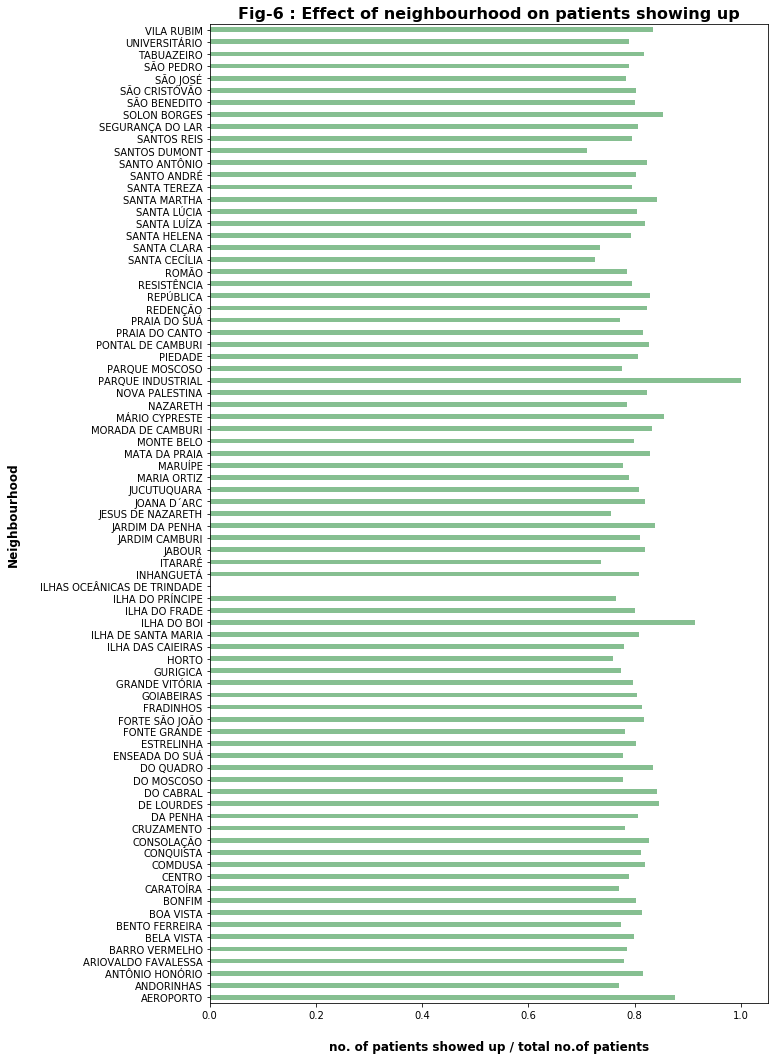

In [65]:
ax = places.plot(kind='barh', figsize=(10, 18), color='#86bf91', zorder=2, width=0.4)
ax.set_title("Fig-6 : Effect of neighbourhood on patients showing up", weight='bold', size=16)
# Set x-axis label
ax.set_xlabel("no. of patients showed up / total no.of patients from the neighbourhood", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Neighbourhood", labelpad=20, weight='bold', size=12)

Most neighbourhoods seem to have similar levels of no.of patients showing up. There are a few outliers but this doesn't seem significant. 

### Research Question 7 : Does age affect patients showing up?

In [6]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [10]:
df.query('age==-1')  # searching data for minimum from the describe() function. This is being done becuase age cannot be negative. 

,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
99832,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,1


In [11]:
df.drop(99832,axis=0,inplace=True)  # droppping negative values

In [9]:
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [55]:
show_1=df.show==1
show_0=df.show==0

In [13]:
df.age[show_1].mean()

37.790504154999034

Average age of people who showed up is 37.8 years

In [14]:
df.age[show_0].mean()

34.31766656212196

Average age of people who did not show up is 34.3 years

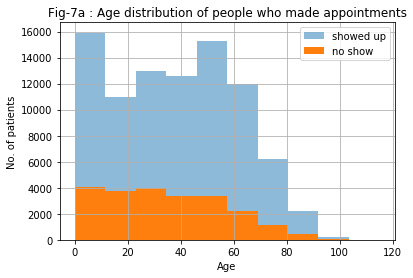

In [15]:
# age distribution of people showing up and not showing up
df.age[show_1].hist(alpha=0.5,label='showed up')
df.age[show_0].hist(label='no show')
plt.legend()
plt.title('Fig-7a : Age distribution of people who made appointments')
plt.xlabel('Age')
plt.ylabel('No. of patients');

In [76]:
df['age_group']=pd.cut(df.age,bins=[0,20,40,60,80,100,115],labels=['age_1','age_2','age_3','age_4','age_5','age_6']) # converting continous variable to a categorical one

In [50]:
df['age_group'].value_counts()

age_3    30081
age_2    28835
age_1    28309
age_4    16910
age_5     2845
age_6        7
Name: age_group, dtype: int64

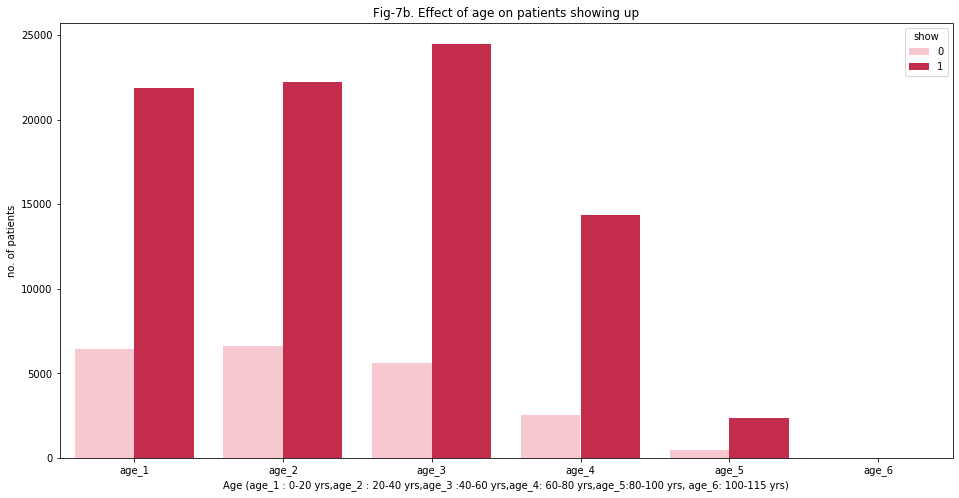

In [75]:
fig, ax = plt.subplots(figsize=(16,8))
sms_plot = sns.countplot(x="age_group",hue='show', data=df,palette=['pink','crimson'])
sms_plot.set_title('Fig-7b. Effect of age on patients showing up')
sms_plot.set_xlabel('Age (age_1 : 0-20 yrs,age_2 : 20-40 yrs,age_3 :40-60 yrs,age_4: 60-80 yrs,age_5:80-100 yrs, age_6: 100-115 yrs)')
sms_plot.set_ylabel('no. of patients');

Look like age cateogry 3 (40-60 yrs) shows up for appointment the most. Also, the no. of people in age 3 category is way more than other categories. 
Therefore, we should also look at figures which've been scaled, like the mean of number of patients showing up for each age category.

In [65]:
age_show1=df.age_group[show_1].value_counts()
age_show1 # count of people who showed up in each age category

age_3    24490
age_2    22209
age_1    21852
age_4    14373
age_5     2379
age_6        4
Name: age_group, dtype: int64

In [63]:
age_show0=df.age_group[show_0].value_counts()
age_show0 # count of people who did not show up in each age category

age_2    6626
age_1    6457
age_3    5591
age_4    2537
age_5     466
age_6       3
Name: age_group, dtype: int64

In [69]:
age_mean=age_show1/(age_show1+age_show0)
age_mean # mean of people who showed in each age category

age_1    0.771910
age_2    0.770210
age_3    0.814135
age_4    0.849970
age_5    0.836204
age_6    0.571429
Name: age_group, dtype: float64

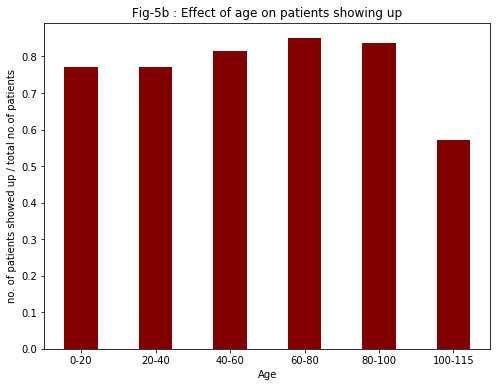

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
x=['0-20','20-40','40-60','60-80','80-100','100-115']
plt.bar(x,height=(age_mean),width=0.45,color='maroon')
plt.title('Fig-7c : Effect of age on patients showing up')
plt.xlabel('Age')
plt.ylabel('no. of patients showed up / total no.of patients');

Age does affect whether patient will show up or not. As seen in the plot above , the mean for age category 60-80 is way more than age group 100-115.

<a id='conclusions'></a>
## Conclusions

Conculsions are listed below (non-exhaustive & preliminary):


**1. Effect having a scholarship on patients showing up :** Refer Fig-1a. People without scholarship show up the most among the four groups i.e: 
-  people with scholarship who also show up 
-  people with scholarship who do not show up 
-  people without scholarship who show up 
-  people without scholarship who do not show up. 

Also, the number of people without scholarship are way more than people with scholarship.Hence, if we just look at absolute number the we'll see that people without scholarship show up the most. But, if we want to capture the effect of  scholarship on people showing up, we need to compare the following:

_[no. of people of who have scholarship and showed up/total no. of people with scholarship] vs [no.of who do not have scholarship and showed up / total no. of people who do not have scholarship]_

This can be achieved using the pandas mean() fucntion. 

Refer fig 1b. If we plot the required means it shows that the effect of not having scholarship on people showing up is not a lot different from people having scholarship. A word of caution - mean statistic is highly susceptible to outliers and hence cannot be used to conculde any effect. At this point, it can only bee seen as an indicator of the underlying trend.We need to conduct further econometric testing to conclude any causation. 

**2. Effect of receiving an SMS on patients showing up:** Refer Fig-2a. People who do not receive an SMS show up the most among the four groups i.e:
-  people who receive an SMS and also show up 
-  people who receive an SMS and do not show up 
-  people who do not receive an SMS and who show up 
-  people whow do not receive an SMS and also who do not show up

Also, the number of people who do not receive an SMS are way more than people who do.Hence, if we just look at absolute number the we'll see that people who do not receive an SMS show up the most. But, if we want to capture the effect of receiving an SMS on people showing up, we need to compare the following:

_[no. of people of who receive an SMS and showed up/total no. of people who received an SMS] vs [no.of people who did not receive an SMS and showed up / total no. of people who did not receive an SMS]_

This can be achieved using the pandas mean() fucntion. 

Refer fig 2b. If we plot the required means it shows that the effect of receiving an SMS on people showing up.It shows a 13% decline in people showing up if they receive an SMS. A word of caution - mean statistic is highly susceptible to outliers and hence cannot be used to conculde any effect. At this point, it can only bee seen as an indicator of the underlying trend.We need to conduct further econometric testing to conclude any causation. 

**3. Effect of having a handicap patients on showing up:** 
According to the description of 'handcap' variable on Kaggle, it should only have true or false values. We see that it has integer values (0,1,2,3,4). We'll consider all values other than 0 to signify : handicap = True. <br><br>Refer Fig-3a. People who do not have a handicap show up the most among the four groups i.e:
-  people who have a hanidcap and show up 
-  people who have a hanidcap and do not show up 
-  people who do not have a hanidcap and show up 
-  people who do not have a hanidcap and also don't show up 

Also, the number of people who don't have a handicap are way more than people who do.Hence, if we just look at absolute number the we'll see that people who do not have a handicap show up the most. But, if we want to capture the effect of having a handicap on people showing up, we need to compare the following:

_[no. of people of who have a hanidcap and showed up/total no. of people who have a handicap] vs [no.of people who do not have a handicap and showed up / total no. of people who do not have a handicap]_

This can be achieved using the pandas mean() fucntion. 

Refer fig 3b. If we plot the required means it shows that the effect of having a handicap on people showing up is not a lot different from people not having a handicap. A word of caution - mean statistic is highly susceptible to outliers and hence cannot be used to conculde any effect. At this point, it can only bee seen as an indicator of the underlying trend.We need to conduct further econometric testing to conclude any causation. 


**Similary we evaluate research question 4. Effect of having alcoholisn on patients showing up  and  5. Effect of gender on patients showing up** 



**6. Effect of neighbourhood on patients showing up:** There are 81 neighbourhoods listed in our dataset. Maximum patient appointments (7717) are from Jardim Camburi.To comapre no.of people showing up from each neighbourhood , we use the follwing statistic: 

_[no. of people from a neighbourhood who showed up/total no. of people who made an appointment from that neighbourhood]_

This can be achieved using the pandas mean() function. 

Refer fig 6. If we plot the required means it shows that most neighbourhoods seem to have similar levels of no.of patients showing up. There are a few outliers but this doesn't seem significant. A word of caution - mean statistic is highly susceptible to outliers and hence cannot be used to conculde any effect. At this point, it can only bee seen as an indicator of the underlying trend.We need to conduct further econometric testing to conclude any causation.

**7. Effect of age on patients showing up:** We first check for any issues with the age data by using the describe() function. Notice that the minimum age is being shown as -1, which is not possible. We explore which rows show this issue. It's just one row in our dataset. Hence,we drop the row and recheck. 

From Fig-7a , we can see that there no major difference in the age distribution of people who showed up and people who did not.

Moreover, we need to convert age to a categorical variable to carry further analysis. We do this by using a range of 20 years and making 6 different age categories. We then carry out a similar anaylsis as done for the scholarship variable. 

From fig-7b, we get that age cateogry 3 (40-60 yrs) shows up for appointment the most. Also, the no. of people in age 3 category is way more than other categories. 
Therefore, we should also look at figures which've been scaled, like the mean of number of patients showing up for each age category.

To comapre no.of people showing up from each age group, we use the follwing statistic: 

_[no. of people from an age group who showed up/total no. of people who made an appointment from that age group]_
 
Refer fig-7c. If we plot the required means it age does affect whether patient will show up or not. As seen in the plot, the mean for age category 60-80 is way more than age group 100-115.A word of caution - mean statistic is highly susceptible to outliers and hence cannot be used to conculde any effect. At this point, it can only bee seen as an indicator of the underlying trend.We need to conduct further econometric testing to conclude any causation.

**Limitations of the analysis:**
- Most of the analysis has been based on the mean statistic. Mean is highly susceptible to outliers and hence we need to do further statistical testing to establish concrete results.
- We have not looked at how the combination of two variables effect the show/no-show outcome
- We've not conducted any regression analysis. Since the outcome variable is an indicator variable ,we can establish some relationship using logistic regression. 
- We can also look at the effect on patient showing up based on the difference between the day appointment was made and the actual visit day

**WEBSITES USED FOR REFERENCE:**
- https://stackoverflow.com/questions
- https://pandas.pydata.org/
- https://www.geeksforgeeks.org/
- https://mode.com/example-gallery/python_horizontal_bar/
- https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html
- https://www.kaggle.com/joniarroba/noshowappointments
- https://www.absentdata.com/pandas/pandas-cut-continuous-to-categorical/
- https://seaborn.pydata.org/tutorial/categorical.html
- Udacity Data Analyst Nanodegree course material